In [1]:
# Import the necessary packages and libraries #
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import numpy.matlib
import pandas 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow
from tensorflow import keras 
import os
from sklearn.neighbors import DistanceMetric

In [2]:
# Sets the precision of the data in the Pandas Dataframes 

pandas.set_option("precision", 10)

In [3]:
# Removes any Tensorflow warnings 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Import the MatLab data #

matlabData = sio.loadmat(file_name='./data/s2_sl2p_uniform_10_replicates_sobol_prosail_inout.mat', variable_names=['Input', 'Output'])

In [5]:
# Extract the input and output data 

bands = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
angles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

In [6]:
# Standardize the calibration data 

cal_data = pandas.concat([bands, angles, LAI, FAPAR, FCOVER], axis=1, join='outer')

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257


In [7]:
# Standardize the calibration data 

cal_data_scaled = pandas.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(cal_data))

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430


In [8]:
# Create subset id's 

rep = 10

subsets = numpy.arange(0, int(cal_data_scaled.shape[0]/10))

subset_ids = numpy.matlib.repmat(subsets, 1, rep)

cal_data_scaled['subset_id'] = subset_ids[0]

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286


In [9]:
# Sample data to create reference database 
# Select samples that have an LAI greater than or equal to four 

ref_data = cal_data_scaled[cal_data['LAI'] >= 4].sample(n=100, ignore_index=False)

ref_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
95564,-0.0017120546,-0.5119398888,-0.0701290731,1.1392400260,1.2866410363,1.1295383943,-0.1641341575,-0.7557940145,0.7385986349,1.1029704538,1.2793337258,0.8703882798,0.8249324688,0.8239331141,9548
88691,0.7865013096,-0.4905407703,0.7837305573,1.3006431406,1.2990209515,1.4135464297,0.7154606104,0.0833175305,0.5254661875,-0.9969399074,-0.6609547601,0.8703882798,0.8029427282,0.8361720312,2675
94696,-0.6302860514,-0.8058728246,-0.6783021843,0.0169608994,0.4051020654,0.4728433439,-0.5514743635,-0.7581309363,0.8018617859,-0.3316943490,0.6903212143,0.8703882798,0.7500419906,0.7101784253,8680
73798,-1.0421516077,-0.4783669513,-0.8972430399,-1.1052269020,-0.9530018448,-0.8315308237,-0.3263170155,-0.2021523380,1.3272389940,0.8977181700,-1.3166513798,0.5222329679,-0.1710826150,-0.2109721190,70
42961,0.0004535301,-0.4881725757,-0.0338460117,1.1610796622,1.2639910418,1.1688678948,-0.1073215055,-0.6611076020,0.6239741746,0.3183755385,-1.0465473845,-0.5222329679,0.6302365686,0.6463786217,6097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117876,-1.1181924056,-0.6957804357,-1.2372721182,0.1281645464,1.0313804006,0.9379419384,0.3016074565,-0.3110769818,1.2258692633,0.5490168008,-1.1402441681,1.5666989036,0.8884671600,0.8436471956,7284
39774,-1.2818056736,-0.7709988671,-1.3951901387,-1.4107395673,-1.2765696609,-1.3034262730,-1.3724456468,-0.8300882042,-1.9799772734,0.8767155554,1.2842856679,-0.5222329679,-0.5187731619,-0.5407592894,2910
71342,1.8170805468,-0.1509848099,1.6417885159,1.6157515838,1.3100173914,1.2906047686,2.2852345706,1.7947185970,0.7691759322,0.5234238089,1.1133242227,0.1740776560,0.6031593603,0.7002500825,9902
65777,0.0483532876,-0.4979814425,0.0470479246,1.0026459795,1.0303150959,1.0218908880,-0.4086273286,-0.8816327812,-1.6752322554,0.9718503908,1.2670606482,0.1740776560,0.7762716066,0.7853617298,4337


In [10]:
# List of indices to remove from the calibration database 

index_list = ref_data.index.values

In [11]:
# Resets the indices in the reference data so that they start from zero

ref_data = ref_data.reset_index(drop=True)

In [12]:
# Removes the indices from calibration database that are in the reference database 

cal_data_scaled = cal_data_scaled.drop(index_list)

In [13]:
# Resets the indices in the calibration data so that they start from zero

cal_data_scaled = cal_data_scaled.reset_index(drop=True)

In [14]:
# Creates the training and validation sets from the calibration data

features_training, features_valid = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [15]:
# Resets the indices in the training data so that they start from zero

features_training = features_training.reset_index(drop=True)

In [16]:
# Resets the indices in the validation data so that they start from zero

features_valid = features_valid.reset_index(drop=True)

In [17]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_feature_training = features_training['LAI']
FAPAR_feature_training = features_training['FAPAR']
FCOVER_feature_training = features_training['FCOVER']

In [18]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_feature_valid = features_valid['LAI']
FAPAR_feature_valid = features_valid['FAPAR']
FCOVER_feature_valid = features_valid['FCOVER']

In [19]:
# Removes that isn't needed for training and validation 
# call them features training and features validation
features_training.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)
features_valid.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3
0,2.8166866095,0.6616385207,2.4916269158,1.3221936188,0.5922563736,0.4869986124,0.4265570620,0.0308145323,0.7935395063,0.9604685872,1.2064627259
1,-1.0753225280,-0.5717664332,-1.1619259694,-0.0954735749,0.2899231417,0.2763891089,0.1176291939,-0.4368471814,-0.6691467083,-0.4276756572,0.6929475279
2,0.6381925174,-0.5117061562,0.6212067971,1.0127180802,1.0449990417,1.1894422026,1.4699527597,0.9062718378,0.7931081429,0.4161367700,-0.8488976841
3,-0.8164017965,-0.6764205851,-0.8493542290,0.0157615335,0.2750171570,0.2822538769,-1.2534795255,-1.2443073529,-0.0409729614,-0.3870006025,0.8856426272
4,1.0262079845,0.4862132721,1.2430842008,0.5709918516,0.0684204676,0.0231070470,0.3925718065,-0.0619154515,-0.8985509540,0.7629258654,-0.9281496385
...,...,...,...,...,...,...,...,...,...,...,...
36829,-1.1681271646,-0.6984318429,-1.2736046506,-0.3697084200,-0.0016686790,0.0635880135,-1.1504672327,-1.2745271263,0.9720467002,0.8099131606,1.2467912964
36830,-0.2358362254,0.7520692092,-0.3416885078,-1.3683940510,-1.5049659506,-1.5021325404,-0.2916261525,1.1395859657,1.3217985255,-0.2047572660,0.6923958811
36831,1.1141483037,-0.3882624024,1.0549114822,1.9364475605,2.0450331630,2.0587275351,2.8734753119,2.1294045237,1.0195326273,-1.5501565329,-0.6444861754
36832,-1.0462649070,-0.9304870597,-1.1124804369,-0.6689856702,-0.4479316041,-0.4232009887,-0.7263162612,-0.8376256164,-0.9775447617,-1.2925241885,-0.7353947466


In [20]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAI_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAI_feature_model = LAI_feature_model.fit(features_training, LAI_feature_training)

FAPAR_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPAR_feature_model = FAPAR_feature_model.fit(features_training, FAPAR_feature_training)

FCOVER_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVER_feature_model = FCOVER_feature_model.fit(features_training, FCOVER_feature_training)

In [21]:
# Makes predictions on the validation data using the LARS models

LAI_feature_predicted = pandas.Series(LAI_feature_model.predict(features_valid))
FAPAR_feature_predicted = pandas.Series(FAPAR_feature_model.predict(features_valid))
FCOVER_feature_predicted = pandas.Series(FCOVER_feature_model.predict(features_valid))

In [22]:
# Extracts the features from the LARS Model

LAI_features = numpy.nonzero(LAI_feature_model.coef_)[0]
FAPAR_features = numpy.nonzero(FAPAR_feature_model.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVER_feature_model.coef_)[0]

LAI_features = features_valid.columns[LAI_features]
FAPAR_features = features_valid.columns[FAPAR_features]
FCOVER_features = features_valid.columns[FCOVER_features]

In [23]:
# Creates arrays containing the calibration and reference data 

ref_array = numpy.array(ref_data[LAI_features])

cal_array = numpy.array(cal_data_scaled[LAI_features])

In [24]:
# Calls function from sci-kit learn for calculating the euclidean distance 

dist = DistanceMetric.get_metric('euclidean')

In [25]:
# Calculates the probability for each sample in the calibration data

probs = numpy.exp(-numpy.amin(dist.pairwise(cal_array,ref_array),1))

In [26]:
# Initialize the probability column in the calibration database 

cal_data_scaled['prob'] = probs 

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [27]:
# Function to normalize the probabilities 

def normalize(data):
    norm_prob = numpy.array(data['prob'])/sum(data['prob'])
    data['prob'] = norm_prob 
    return data

In [28]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000033500
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000033500
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000033500
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000033500
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000033500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000095202
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000095202
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000095202
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000095202


In [29]:
# Initialize the probability column in the calibration database 

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [30]:
# Assign max probability in each subset to every member of that subset 

cal_data_scaled['prob'] = cal_data_scaled.groupby('subset_id')['prob'].transform('max')

In [31]:
# Function to normalize the probabilities 

def normalize(data):
    norm_prob = numpy.array(data['prob'])/sum(data['prob'])
    data['prob'] = norm_prob 
    return data

In [32]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000081446
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000081446
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000081446
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000081446
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000081446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000081446
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000081446
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000081446
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000081446


In [33]:
# Creates the training and validation sets from the calibration data

training_data, valid_data = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [34]:
# Resets the indices in the training data so that they start from zero

training_data = training_data.reset_index(drop=True)

In [35]:
# Resets the indices in the validation data so that they start from zero

valid_data = valid_data.reset_index(drop=True)

In [36]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_training = training_data['LAI']
FAPAR_training = training_data['FAPAR']
FCOVER_training = training_data['FCOVER']

In [37]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_valid = valid_data['LAI']
FAPAR_valid = valid_data['FAPAR']
FCOVER_valid = valid_data['FCOVER']

In [38]:
# Extracts the probabilites for training and validation 

training_weights = numpy.array(training_data['prob'])
valid_weights = numpy.array(valid_data['prob'])

In [39]:
# Removes that isn't needed for training and validation 
# Explicitly subset the inputs
training_data = training_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)
valid_data = valid_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)

In [40]:
LAI_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FAPAR_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FCOVER_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [41]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [42]:
# Runs NN Model for LAI

LAI_history = LAI_model.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            sample_weight = training_weights,
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid), valid_weights),
                            callbacks=[LAI_callback]
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 19s 222us/sample - loss: 2.8507e-06 - mse: 0.3500 - mae: 0.4670 - val_loss: 1.7603e-06 - val_mse: 0.2161 - val_mae: 0.3656
Epoch 2/120
85946/85946 [==============================] - 18s 205us/sample - loss: 1.5146e-06 - mse: 0.1860 - mae: 0.3387 - val_loss: 1.3242e-06 - val_mse: 0.1626 - val_mae: 0.3142
Epoch 3/120
85946/85946 [==============================] - 19s 216us/sample - loss: 1.2537e-06 - mse: 0.1539 - mae: 0.3058 - val_loss: 1.1716e-06 - val_mse: 0.1439 - val_mae: 0.2963
Epoch 4/120
85946/85946 [==============================] - 21s 241us/sample - loss: 1.1450e-06 - mse: 0.1406 - mae: 0.2917 - val_loss: 1.0851e-06 - val_mse: 0.1332 - val_mae: 0.2831
Epoch 5/120
85946/85946 [==============================] - 17s 201us/sample - loss: 1.0750e-06 - mse: 0.1320 - mae: 0.2819 - val_loss: 1.0350e-06 - val_mse: 0.1271 - val_mae: 0.2749
Epoch 6/120
85946/85946 [===============

In [43]:
# Runs NN Model for FAPAR

FAPAR_history = FAPAR_model.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                sample_weight = training_weights,
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid), valid_weights),
                                callbacks=[FAPAR_callback]
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 24s 275us/sample - loss: 8.6672e-07 - mse: 0.1064 - mae: 0.2182 - val_loss: 3.6176e-07 - val_mse: 0.0444 - val_mae: 0.1548
Epoch 2/20
85946/85946 [==============================] - 18s 209us/sample - loss: 2.9082e-07 - mse: 0.0357 - mae: 0.1393 - val_loss: 2.4634e-07 - val_mse: 0.0302 - val_mae: 0.1272
Epoch 3/20
85946/85946 [==============================] - 18s 209us/sample - loss: 2.1696e-07 - mse: 0.0266 - mae: 0.1195 - val_loss: 1.9954e-07 - val_mse: 0.0245 - val_mae: 0.1141
Epoch 4/20
85946/85946 [==============================] - 18s 209us/sample - loss: 1.7962e-07 - mse: 0.0221 - mae: 0.1082 - val_loss: 1.7233e-07 - val_mse: 0.0212 - val_mae: 0.1051
Epoch 5/20
85946/85946 [==============================] - 18s 213us/sample - loss: 1.6300e-07 - mse: 0.0200 - mae: 0.1023 - val_loss: 1.5739e-07 - val_mse: 0.0193 - val_mae: 0.0996
Epoch 6/20
85946/85946 [=====================

In [44]:
# Runs NN Model for FCOVER

FCOVER_history = FCOVER_model.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  sample_weight = training_weights,
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid), valid_weights),
                                  callbacks=[FCOVER_callback]
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 23s 269us/sample - loss: 1.0593e-06 - mse: 0.1301 - mae: 0.2056 - val_loss: 2.6072e-07 - val_mse: 0.0320 - val_mae: 0.1268
Epoch 2/20
85946/85946 [==============================] - 17s 203us/sample - loss: 2.1965e-07 - mse: 0.0270 - mae: 0.1177 - val_loss: 1.9192e-07 - val_mse: 0.0236 - val_mae: 0.1100
Epoch 3/20
85946/85946 [==============================] - 17s 201us/sample - loss: 1.7125e-07 - mse: 0.0210 - mae: 0.1053 - val_loss: 1.5678e-07 - val_mse: 0.0192 - val_mae: 0.1013
Epoch 4/20
85946/85946 [==============================] - 17s 201us/sample - loss: 1.4750e-07 - mse: 0.0181 - mae: 0.0985 - val_loss: 1.4371e-07 - val_mse: 0.0176 - val_mae: 0.0970
Epoch 5/20
85946/85946 [==============================] - 17s 201us/sample - loss: 1.3615e-07 - mse: 0.0167 - mae: 0.0944 - val_loss: 1.4720e-07 - val_mse: 0.0181 - val_mae: 0.0959
Epoch 6/20
85946/85946 [=====================

In [45]:
# These are all plots for the RMSE of the NN as training was run

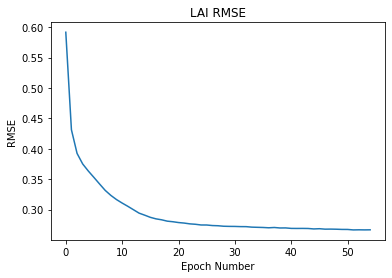

In [46]:
LAI_rmse = plt.plot(numpy.sqrt(LAI_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("LAI RMSE")
plt.show()

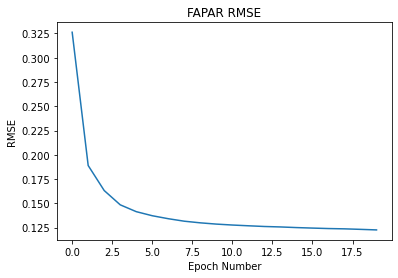

In [47]:
FAPAR_rmse = plt.plot(numpy.sqrt(FAPAR_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FAPAR RMSE")
plt.show()

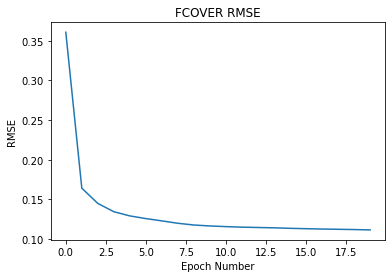

In [48]:
FCOVER_rmse = plt.plot(numpy.sqrt(FCOVER_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FCOVER RMSE")
plt.show()

In [49]:
# Makes predictions on the validation data using the 

LAI_predictions = pandas.Series(LAI_model.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions = pandas.Series(FAPAR_model.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions = pandas.Series(FCOVER_model.predict(numpy.array(valid_data)).flatten())

In [50]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAImodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAImodel = LAImodel.fit(training_data, LAI_training)

FAPARmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPARmodel = FAPARmodel.fit(training_data, FAPAR_training)

FCOVERmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVERmodel = FCOVERmodel.fit(training_data, FCOVER_training)

In [51]:
# Makes predictions on the validation data using the LARS models

LAI_predicted = pandas.Series(LAImodel.predict(valid_data))
FAPAR_predicted = pandas.Series(FAPARmodel.predict(valid_data))
FCOVER_predicted = pandas.Series(FCOVERmodel.predict(valid_data))

In [52]:
# Function that creates the density plots 

def plotting_function(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax = ax
    input_var = input_var*cal_data[var].std() + cal_data[var].mean()
    resp_var = resp_var*cal_data[var].std() + cal_data[var].mean()
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x = input_var[idx]
    y = resp_var[idx]
    z = z[idx]
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

Text(0.5, 0.98, 'Reference LAI Greater than Four - LARS')

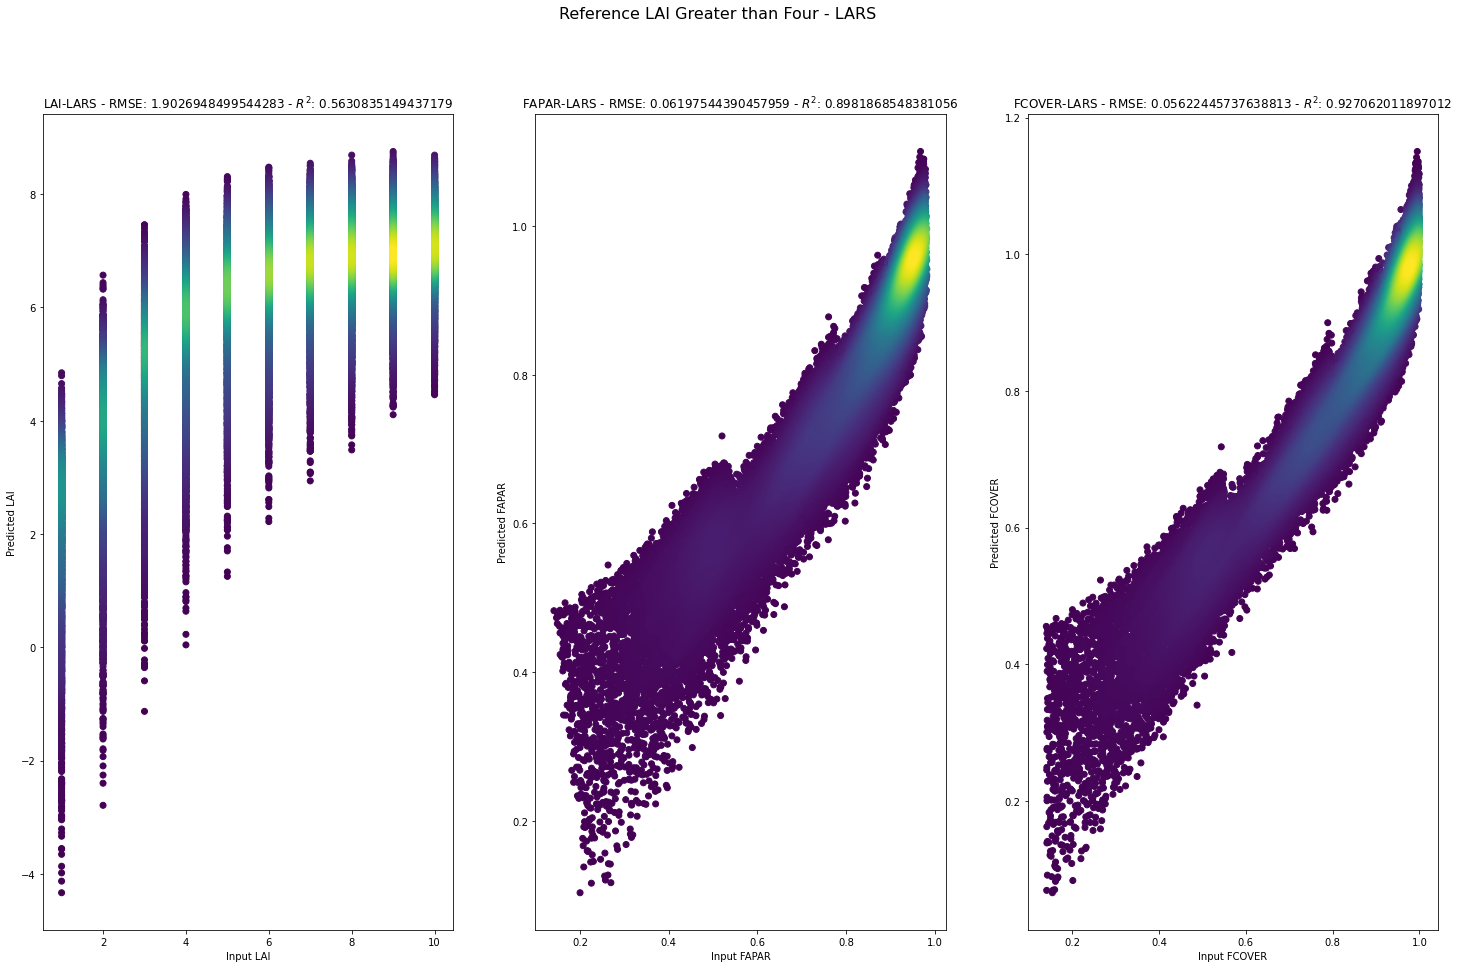

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI',LAI_valid, LAI_predicted, 'LAI','Input LAI','Predicted LAI','LARS', ax1)
  
plotting_function('FAPAR',FAPAR_valid, FAPAR_predicted, 'FAPAR','Input FAPAR','Predicted FAPAR','LARS', ax2)

plotting_function('FCOVER',FCOVER_valid, FCOVER_predicted, 'FCOVER','Input FCOVER','Predicted FCOVER','LARS', ax3)

fig.suptitle('Reference LAI Greater than Four - LARS', fontsize=16)

Text(0.5, 0.98, 'Reference LAI Greater than Four - Neural Network - with weights')

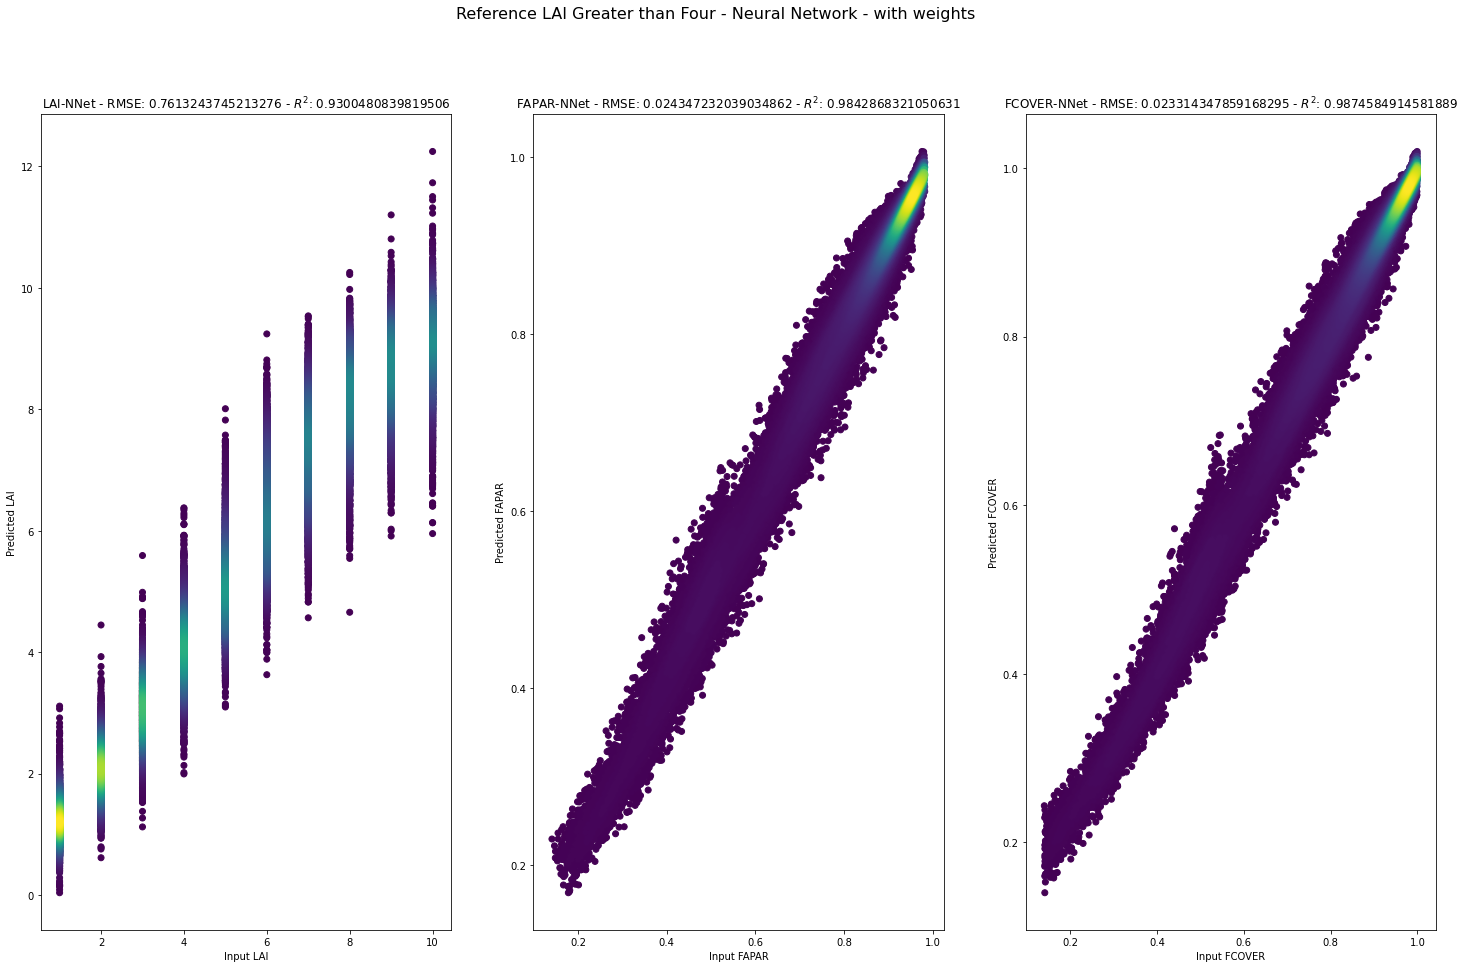

In [54]:
fig, (ax4, ax5, ax6) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet',ax4)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax5)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax6)

fig.suptitle('Reference LAI Greater than Four - Neural Network - with weights', fontsize=16)

In [55]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [56]:
# Runs NN Model for LAI

LAI_history_no_weights = LAI_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid)) 
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 20s 231us/sample - loss: 0.2982 - mse: 0.2982 - mae: 0.4302 - val_loss: 0.1829 - val_mse: 0.1829 - val_mae: 0.3339
Epoch 2/120
85946/85946 [==============================] - 15s 179us/sample - loss: 0.1552 - mse: 0.1552 - mae: 0.3072 - val_loss: 0.1345 - val_mse: 0.1345 - val_mae: 0.2853
Epoch 3/120
85946/85946 [==============================] - 15s 179us/sample - loss: 0.1283 - mse: 0.1283 - mae: 0.2792 - val_loss: 0.1199 - val_mse: 0.1199 - val_mae: 0.2699
Epoch 4/120
85946/85946 [==============================] - 15s 178us/sample - loss: 0.1170 - mse: 0.1170 - mae: 0.2668 - val_loss: 0.1119 - val_mse: 0.1119 - val_mae: 0.2612
Epoch 5/120
85946/85946 [==============================] - 16s 183us/sample - loss: 0.1089 - mse: 0.1089 - mae: 0.2575 - val_loss: 0.1045 - val_mse: 0.1045 - val_mae: 0.2510
Epoch 6/120
85946/85946 [==============================] - 16s 181us/sample - lo

In [57]:
# Runs NN Model for FAPAR

FAPAR_history_no_weights = FAPAR_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid))
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 22s 257us/sample - loss: 0.1003 - mse: 0.1003 - mae: 0.1998 - val_loss: 0.0314 - val_mse: 0.0314 - val_mae: 0.1293
Epoch 2/20
85946/85946 [==============================] - 17s 195us/sample - loss: 0.0257 - mse: 0.0257 - mae: 0.1166 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1076
Epoch 3/20
85946/85946 [==============================] - 18s 204us/sample - loss: 0.0205 - mse: 0.0205 - mae: 0.1032 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.0993
Epoch 4/20
85946/85946 [==============================] - 17s 201us/sample - loss: 0.0188 - mse: 0.0188 - mae: 0.0983 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.0962
Epoch 5/20
85946/85946 [==============================] - 17s 202us/sample - loss: 0.0179 - mse: 0.0179 - mae: 0.0955 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0949
Epoch 6/20
85946/85946 [==============================] - 17s 200us/sample - loss: 0.

In [58]:
# Runs NN Model for FCOVER

FCOVER_history_no_weights = FCOVER_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid))
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 22s 261us/sample - loss: 0.0591 - mse: 0.0591 - mae: 0.1642 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1066
Epoch 2/20
85946/85946 [==============================] - 17s 202us/sample - loss: 0.0175 - mse: 0.0175 - mae: 0.0952 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0902
Epoch 3/20
85946/85946 [==============================] - 17s 198us/sample - loss: 0.0153 - mse: 0.0153 - mae: 0.0884 - val_loss: 0.0147 - val_mse: 0.0147 - val_mae: 0.0866
Epoch 4/20
85946/85946 [==============================] - 17s 202us/sample - loss: 0.0146 - mse: 0.0146 - mae: 0.0860 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0858
Epoch 5/20
85946/85946 [==============================] - 17s 202us/sample - loss: 0.0140 - mse: 0.0140 - mae: 0.0845 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0830
Epoch 6/20
85946/85946 [==============================] - 17s 202us/sample - loss: 0.

In [59]:
# Makes predictions on the validation data

LAI_predictions_no_weights = pandas.Series(LAI_model_no_weights.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions_no_weights = pandas.Series(FAPAR_model_no_weights.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions_no_weights = pandas.Series(FCOVER_model_no_weights.predict(numpy.array(valid_data)).flatten())

Text(0.5, 0.98, 'Reference LAI Greater than Four - Neural Network - without weights')

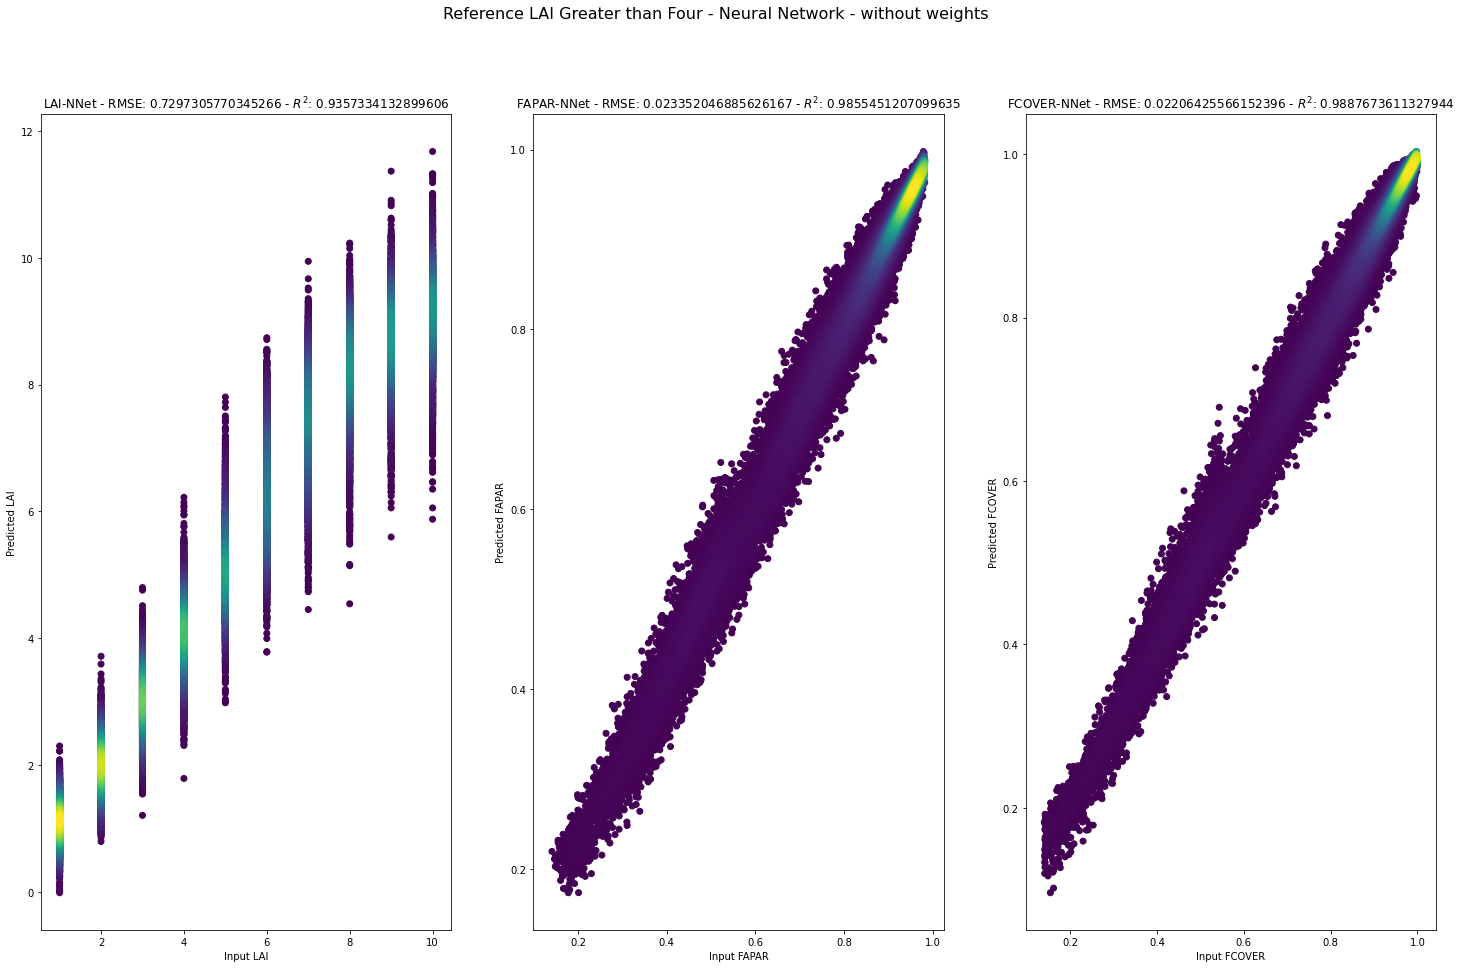

In [60]:
fig, (ax7, ax8, ax9) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions_no_weights, 'LAI','Input LAI','Predicted LAI','NNet',ax7)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions_no_weights, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax8)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions_no_weights, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax9)

fig.suptitle('Reference LAI Greater than Four - Neural Network - without weights', fontsize=16)